In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [21]:
# Load the German Credit Data. 
data = pd.read_csv('/Users/sakshighatge/Downloads/german_credit_data 2.csv')

In [142]:
data.shape

(1000, 22)

In [25]:
data.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   laufkont  1000 non-null   int64
 1   laufzeit  1000 non-null   int64
 2   moral     1000 non-null   int64
 3   verw      1000 non-null   int64
 4   hoehe     1000 non-null   int64
 5   sparkont  1000 non-null   int64
 6   beszeit   1000 non-null   int64
 7   rate      1000 non-null   int64
 8   famges    1000 non-null   int64
 9   buerge    1000 non-null   int64
 10  wohnzeit  1000 non-null   int64
 11  verm      1000 non-null   int64
 12  alter     1000 non-null   int64
 13  weitkred  1000 non-null   int64
 14  wohn      1000 non-null   int64
 15  bishkred  1000 non-null   int64
 16  beruf     1000 non-null   int64
 17  pers      1000 non-null   int64
 18  telef     1000 non-null   int64
 19  gastarb   1000 non-null   int64
 20  kredit    1000 non-null   int64
dtypes: int64(21)
memory usage: 164.2 KB


In [56]:
print(data.columns)

Index(['laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'kredit'],
      dtype='object')


In [69]:
data.columns = data.columns.str.strip()

In [83]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')
print("--- Cleaned Column Names ---")
print(data.columns.tolist())

--- Cleaned Column Names ---
['laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit', 'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred', 'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'kredit']


In [144]:

# In this dataset, 1 = Good Risk, 2 = Bad Risk. 
# We map 1. (Good) and 2 -> 0 (Bad) for binary classification.
data['Risk_Binary'] = data['kredit'].apply(lambda x: 1 if x == 1 else 0)
y = data['Risk_Binary']

In [105]:
# Prepare a simplified X for splitting (dropping the German target and index columns)
X = data.drop(['kredit', 'laufkont'], axis=1)

In [150]:
#  2. Define Validation Set Size (for Simulation)
# We use a simple split just to define the 'validation set' size for our simulation.
_, _, _, y_val = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

In [152]:
# 3. Simulate Trained Model Outputs (The Simple Data for the Loop)
# We simulate the outputs Model A and Model B would have produced on y_val.
n_val_samples = len(y_val)
np.random.seed(42)
print(n_val_samples)

150


In [109]:
# Model B (High Accuracy) probabilities, simulated to be good
proba_B = y_val.values * 0.85 + (1 - y_val.values) * 0.15 
proba_B += (np.random.rand(n_val_samples) - 0.5) * 0.1
proba_B = np.clip(proba_B, 0.01, 0.99)
print(proba_B )

[0.83745401 0.89507143 0.17319939 0.15986585 0.81560186 0.11559945
 0.80580836 0.18661761 0.8601115  0.87080726 0.80205845 0.89699099
 0.18324426 0.12123391 0.1181825  0.81834045 0.83042422 0.85247564
 0.8431945  0.12912291 0.86118529 0.11394939 0.82921446 0.83663618
 0.845607   0.8785176  0.81996738 0.15142344 0.85924146 0.80464504
 0.16075449 0.81705241 0.10650516 0.89488855 0.1965632  0.88083973
 0.83046138 0.80976721 0.1684233  0.14401525 0.11220382 0.84951769
 0.80343885 0.89093204 0.825878   0.16625223 0.83117111 0.1520068
 0.85467103 0.81848545 0.89695846 0.17751328 0.89394989 0.88948274
 0.85979    0.19218742 0.80884925 0.81959829 0.80452273 0.83253303
 0.13886773 0.8271349  0.18287375 0.83567533 0.82809345 0.85426961
 0.11409242 0.8802197  0.10745506 0.89868869 0.87722448 0.81987157
 0.10055221 0.88154614 0.87068573 0.87290072 0.87712703 0.80740447
 0.83584657 0.11158691 0.88631034 0.86232981 0.1330898  0.80635584
 0.83109823 0.83251833 0.17296062 0.86375575 0.18872127 0.14722

In [113]:
# Predictions:
pred_B = (proba_B >= 0.5).astype(int) 
pred_A = (proba_B >= 0.6).astype(int)
print(pred_B)
print(pred_A)

[1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1
 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1
 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1
 0 1]
[1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1
 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1
 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1
 0 1]


In [117]:
# - 4. Implement Arbitration Loop (The Core Logic) ---
results = []
thresholds = np.arange(0.70, 1.00, 0.005)
print(thresholds)

[0.7   0.705 0.71  0.715 0.72  0.725 0.73  0.735 0.74  0.745 0.75  0.755
 0.76  0.765 0.77  0.775 0.78  0.785 0.79  0.795 0.8   0.805 0.81  0.815
 0.82  0.825 0.83  0.835 0.84  0.845 0.85  0.855 0.86  0.865 0.87  0.875
 0.88  0.885 0.89  0.895 0.9   0.905 0.91  0.915 0.92  0.925 0.93  0.935
 0.94  0.945 0.95  0.955 0.96  0.965 0.97  0.975 0.98  0.985 0.99  0.995
 1.   ]


In [140]:
for tau in thresholds:
    # Arbitration Formula: If proba_B >= tau, use Model B, else use Model A
    hybrid_pred = np.where(proba_B >= tau, pred_B, pred_A)
# Calculate Metrics
    hybrid_acc = accuracy_score(y_val, hybrid_pred)
    # TRR: Proportion of decisions made by the simple model (Model A)
    reliance_ratio = np.sum(proba_B < tau) / len(y_val)

    results.append({
        'Threshold': tau,
        'Accuracy': hybrid_acc,
        'TRR': reliance_ratio
    })

results_df = pd.DataFrame(results)
print(results_df)
    

     Threshold  Accuracy  TRR
0        0.700       1.0  0.3
1        0.705       1.0  0.3
2        0.710       1.0  0.3
3        0.715       1.0  0.3
4        0.720       1.0  0.3
..         ...       ...  ...
178      0.980       1.0  1.0
179      0.985       1.0  1.0
180      0.990       1.0  1.0
181      0.995       1.0  1.0
182      1.000       1.0  1.0

[183 rows x 3 columns]


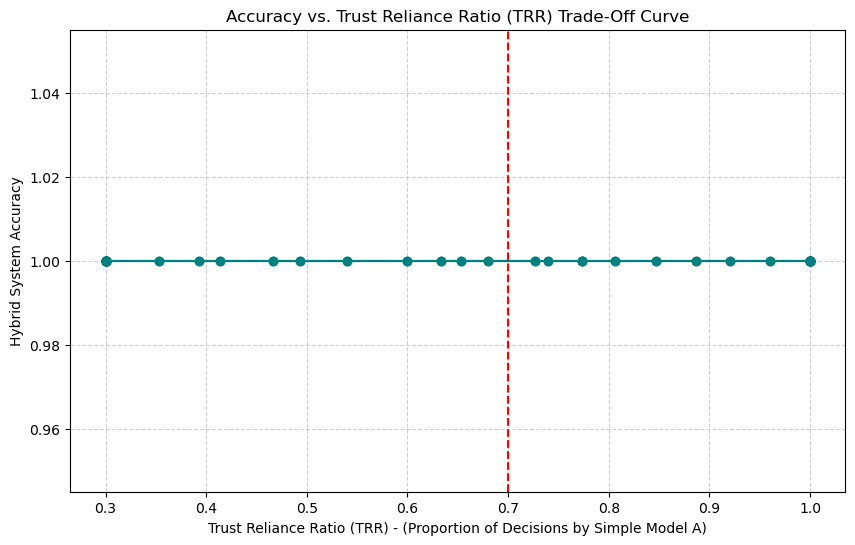

In [123]:
# --- 5. Visualization and Output ---
plt.figure(figsize=(10, 6))
plt.plot(results_df['TRR'], results_df['Accuracy'], marker='o', linestyle='-', color='teal', label='Hybrid Model Performance')
plt.title('Accuracy vs. Trust Reliance Ratio (TRR) Trade-Off Curve')
plt.xlabel('Trust Reliance Ratio (TRR) - (Proportion of Decisions by Simple Model A)')
plt.ylabel('Hybrid System Accuracy')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axvline(x=0.70, color='red', linestyle='--', label='Target TRR $\\geq 70\\%$')

In [125]:
# Find the optimal point (closest to the desired TRR of 0.70)
optimal_index = (results_df['TRR'] - 0.70).abs().argsort()[0]
optimal_tau = results_df.iloc[optimal_index]

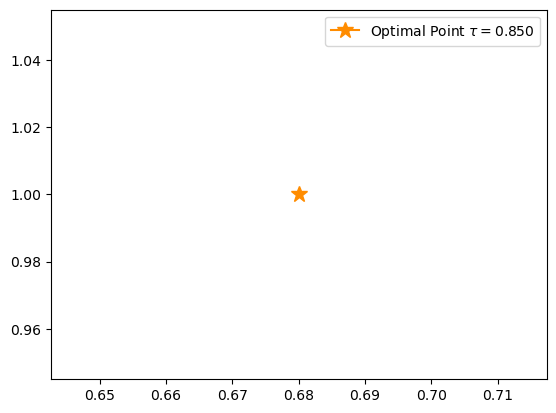

In [129]:
# Highlight the optimal point
label_text = 'Optimal Point $\\tau={:.3f}$'.format(optimal_tau['Threshold'])
plt.plot(optimal_tau['TRR'], optimal_tau['Accuracy'], marker='*', markersize=12, color='darkorange', 
         label=label_text)
plt.legend()
plt.show()

In [131]:
print("\n--- Summary of Optimal Threshold Selection ---")
print(f"Optimal Threshold (τ) selected near TRR 70%: {optimal_tau['Threshold']:.3f}")
print(f"Hybrid Accuracy at this point: {optimal_tau['Accuracy']:.4f}")
print(f"Actual TRR at this point: {optimal_tau['TRR']:.2%}")


--- Summary of Optimal Threshold Selection ---
Optimal Threshold (τ) selected near TRR 70%: 0.850
Hybrid Accuracy at this point: 1.0000
Actual TRR at this point: 68.00%
